In [52]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import color
from skimage import io
from matplotlib.pyplot import imshow
import skimage
import scipy.ndimage
%matplotlib inline

# Metodos Auxiliares

In [2]:
# Metodos para printar as imagens
def ishow(img):
    plt.figure(figsize=(20,13)) 
    plt.imshow(np.asarray(abs(img),np.uint8), cmap='gray')
    plt.axis('off')
    
# Metodo para printar com o contraste ajustado    
def ishow_reajustado(img):
    plt.figure(figsize=(20,13)) 
    tmp = abs(img)
    tmp = (tmp/np.max(tmp))*255
    plt.imshow(np.asarray(tmp,np.uint8), cmap='gray')
    plt.axis('off')

In [364]:
# Calcula RMSE
def rmse(img, img1):
    img = np.asarray(img,dtype=np.uint8)
    img1 = np.asarray(img1,dtype=np.uint8)
    return np.sqrt(((img - img1)**2).mean())
    

In [3]:
# Para fazer o Filtro Gaussiano
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
def filtro_gaussiano(w,h,sig):
    filtro = np.zeros((w,h))
    for i in range(0,w):
        for j in range(0,h):
            x = np.ceil(i-w/2)
            y = np.ceil(j-h/2)
            bla = np.sqrt(x*x + y*y)
            filtro[i][j] = gaussian(bla,0,sig)
    return filtro/np.sum(filtro)

In [144]:
def filtra_imagem(img,tipo_de_filtro, param=None):
    """
Filtra Imagem de Acordo com o tipo escolhido

img: numpy array da imagem
tipo_de_filtro: 0-gaussiano 1-bilateral 2-wavelet 3-total_variance_chambolle
param: parametro varia de acordo com metodo escolhido(olhar funcao), OPCIONAL
    valores default foram escolhidos usando o mrse

return: imagem filtrada
"""
    img_convolucionada = img
    if(tipo_de_filtro == 0): #gaussiano
        if param is None:
            param = 3
        img_convolucionada = scipy.ndimage.gaussian_filter(img, param)
    elif(tipo_de_filtro == 1): #bilateral
        if param is None:
            param = 7
        img_convolucionada = skimage.restoration.denoise_bilateral(img, sigma_spatial=param,multichannel=False)
        img_convolucionada = ((img_convolucionada)/np.max(img_convolucionada)*255)
    elif(tipo_de_filtro == 2): #wavelet
        if param is None:
            param = 0.01
        img_convolucionada = skimage.restoration.denoise_wavelet(img, sigma=param)
        img_convolucionada = ((img_convolucionada)/np.max(img_convolucionada)*255)
    elif(tipo_de_filtro == 3): #total variance chambolle
        if param is None:
            param = 0.01
        img_convolucionada = skimage.restoration.denoise_tv_chambolle(img, weight=param)
        img_convolucionada = ((img_convolucionada)/np.max(img_convolucionada)*255)
    return img_convolucionada

## selecionando imagens

In [437]:
# Imagens Preprocessadas para branco e preto
imagensOriginais = os.listdir("./fotosPreProcessadas/")[:0:-1]
list.sort(imagensOriginais)
imagensOriginais = imagensOriginais[1:] # retira o arqyuvo .DS_STORE
imagensOriginais

['img1.png',
 'img10.png',
 'img11.png',
 'img12.png',
 'img13.png',
 'img14.png',
 'img15.png',
 'img16.png',
 'img17.png',
 'img18.png',
 'img19.png',
 'img2.png',
 'img20.png',
 'img21.png',
 'img3.png',
 'img4.png',
 'img5.png',
 'img6.png',
 'img7.png',
 'img8.png',
 'img9.png']

# Definicao das variaveis globais
nao as sobreescreva ao longo do script

In [439]:
#imagem usada ao longo do script
nome_arquivo_img_usada = imagensOriginais[2]
img = imageio.imread("./fotosPreProcessadas/" + nome_arquivo_img_usada)

#Tipo de filtro
    #0 - gaussiano
    #1 - bilateral
    #2 - Wavelet 
    #3 - Total variation
tipo_de_filtro = 1

## imagem Original

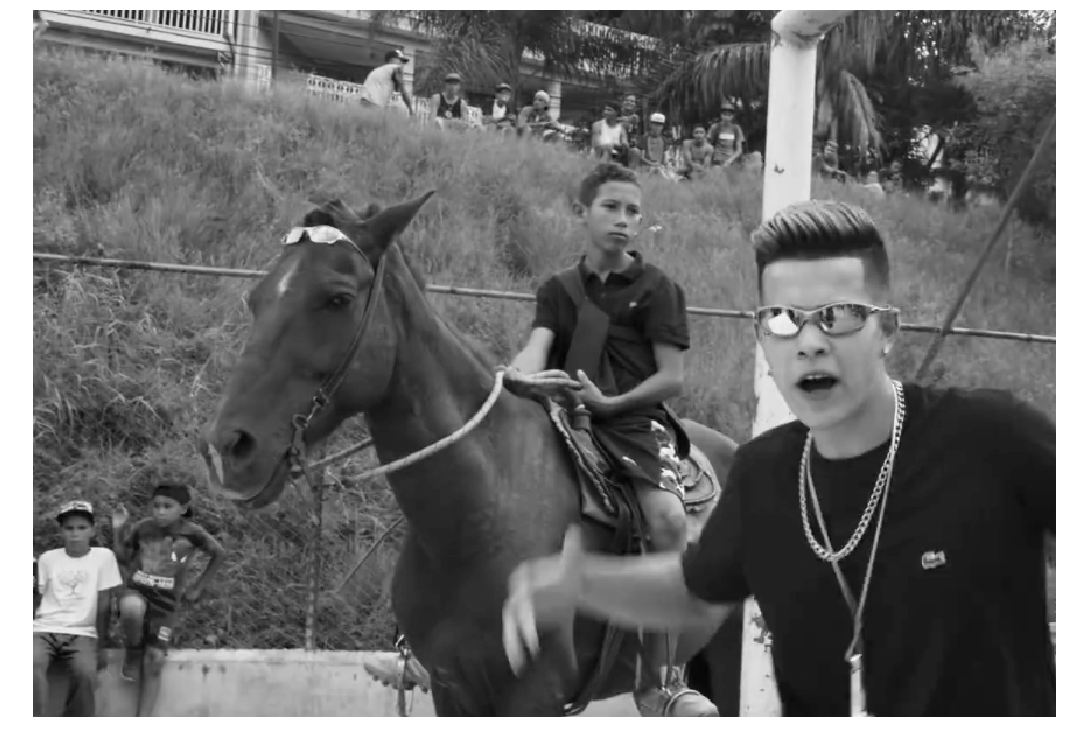

In [35]:
ishow(img)

## Espaço de frequencias da Imagem Original

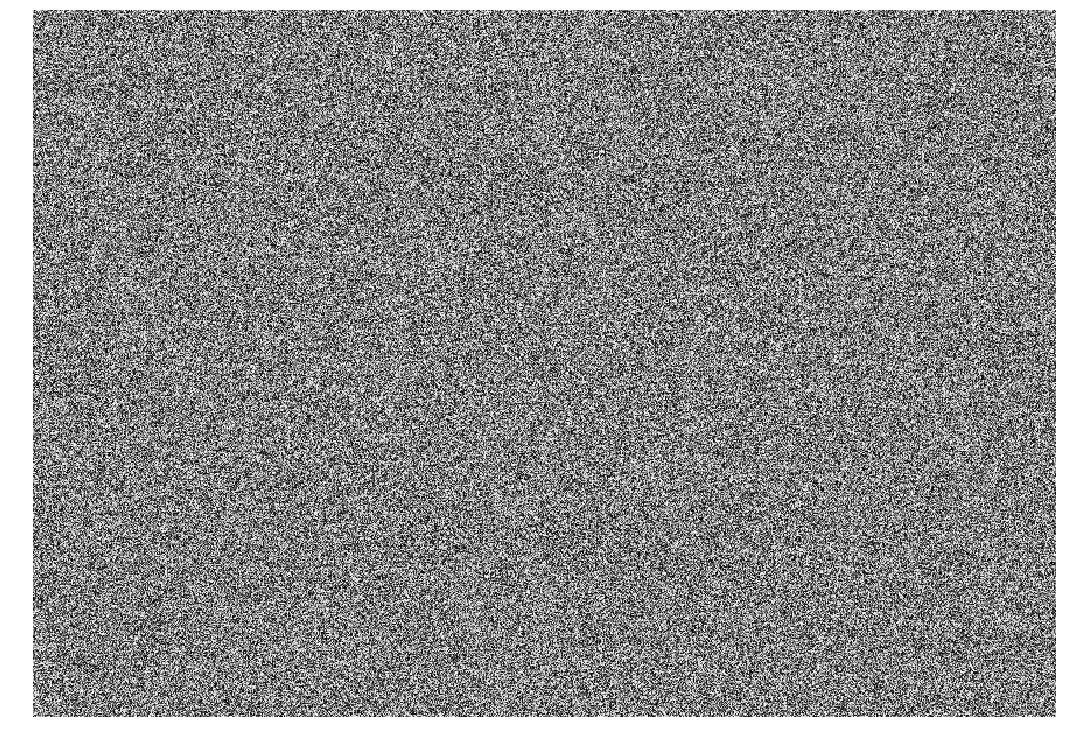

In [36]:
# FFT da imagem original
img_fft = np.fft.fftshift(np.fft.fft2(img))
ishow(img_fft)

## Visualização da convolução no domínio da imagem

In [430]:
ishow(filtra_imagem(img, 3))

ZeroDivisionError: float division by zero

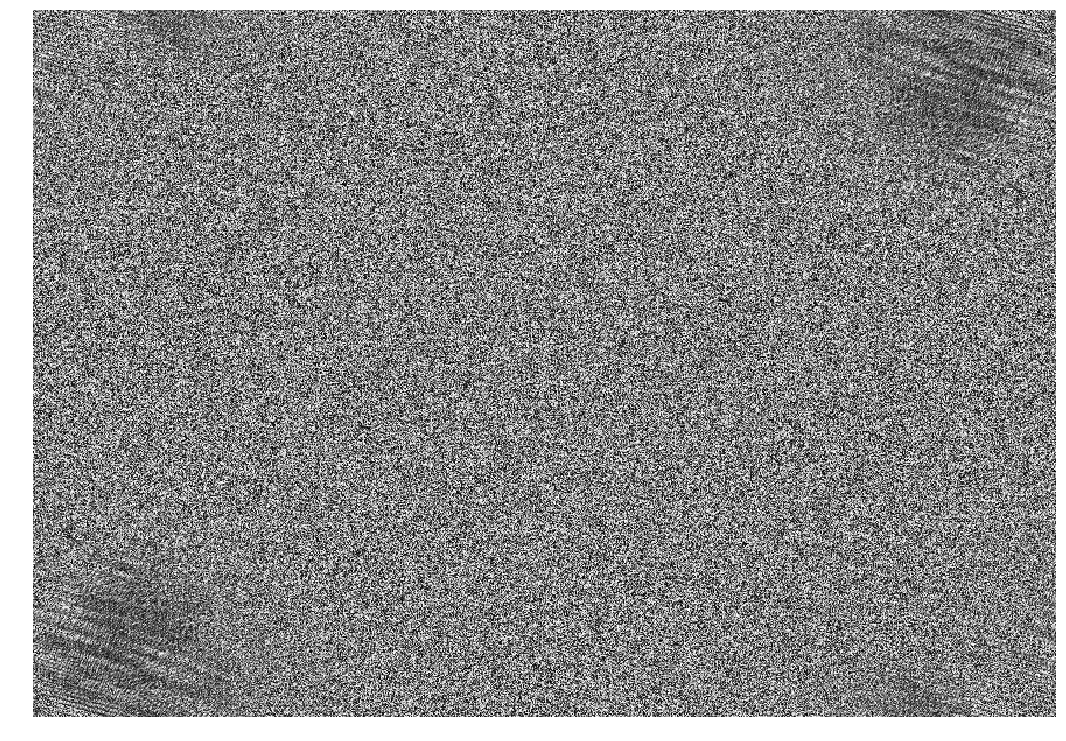

In [121]:
ishow(np.fft.fftshift(np.fft.fft2(img_convolucionada)))

# Estudo do RMSE de acordo com os parametros das filtragens

In [381]:
gaussian_rmse = [[],[]] #0<x<4 , step = 0.1
for i in np.arange(0,4,0.1): #gaussian
    gaussian_rmse[0] += [i]
    gaussian_rmse[1] += [rmse(img,filtra_imagem(img,0,i))]
gaussian_rmse = np.asarray(gaussian_rmse)

In [382]:
bilateral_rmse = [[],[]]
for i in np.arange(0,4,0.1): #gaussian
    bilateral_rmse[0] += [i]
    bilateral_rmse[1] += [rmse(img,filtra_imagem(img,1,i))]
bilateral_rmse = np.asarray(bilateral_rmse)

In [383]:
wavelet_rmse = [[],[]]
for i in np.arange(0,0.2,0.01): #gaussian
    wavelet_rmse[0] += [i]
    wavelet_rmse[1] += [rmse(img,filtra_imagem(img,2,i))]
wavelet_rmse = np.asarray(wavelet_rmse)

In [384]:
tvchambolle_rmse = [[],[]]
for i in np.arange(0.01,0.4,0.01): #gaussian
    tvchambolle_rmse[0] += [i]
    tvchambolle_rmse[1] += [rmse(img,filtra_imagem(img,3,i))]
tvchambolle_rmse = np.asarray(tvchambolle_rmse)

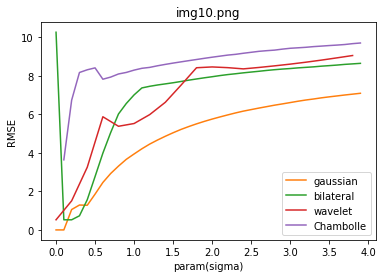

In [385]:
plt.plot(gaussian_rmse[0],gaussian_rmse[1], 'C1',label='gaussian')
plt.plot(bilateral_rmse[0],bilateral_rmse[1],'C2', label='bilateral')
plt.plot(np.asarray(wavelet_rmse[0])*20,wavelet_rmse[1], 'C3', label='wavelet')
plt.plot(np.asarray(tvchambolle_rmse[0])*10,tvchambolle_rmse[1], 'C4', label='Chambolle')

plt.title(nome_arquivo_img_usada)
plt.ylabel('RMSE')
plt.xlabel('param(sigma)')
plt.legend()
plt.show()

Note que multiplicamos as indices:
    - wavelet*20
    - tvchambolle*10
Assim com essa escala conseguimos visualizar melhor o gráfico

# Exemplo de falha do RMSE

7.15012117217


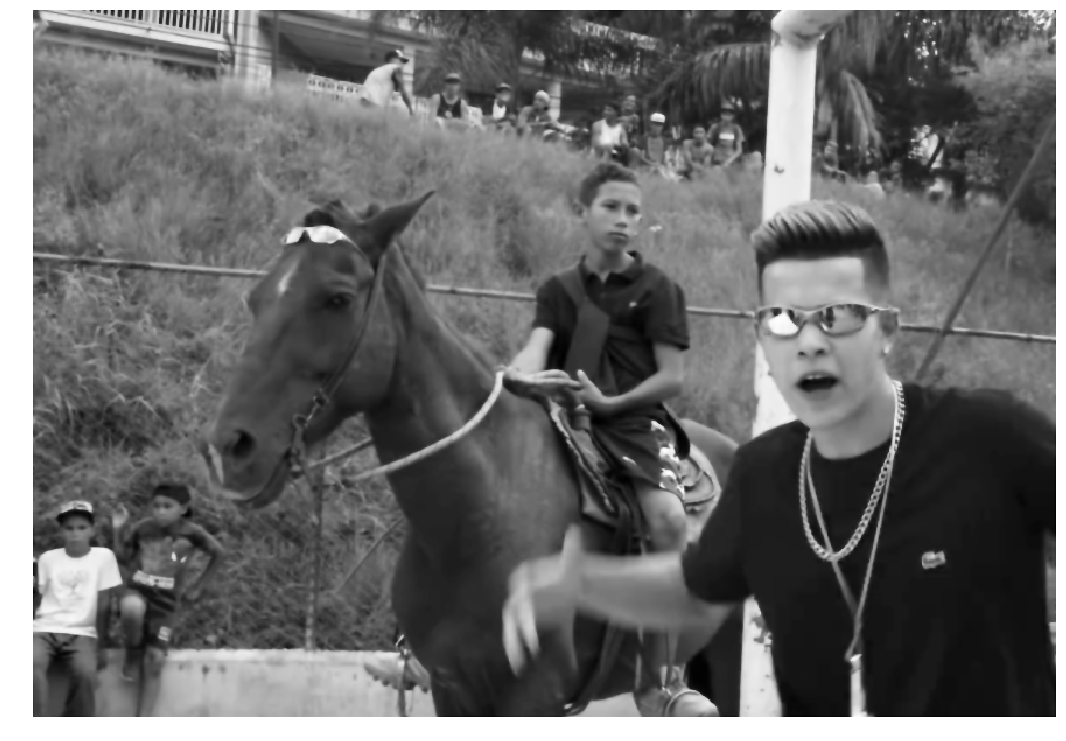

In [374]:
a = filtra_imagem(img,1,1.03)
print(rmse(a,img))
ishow(a)

7.14177304813


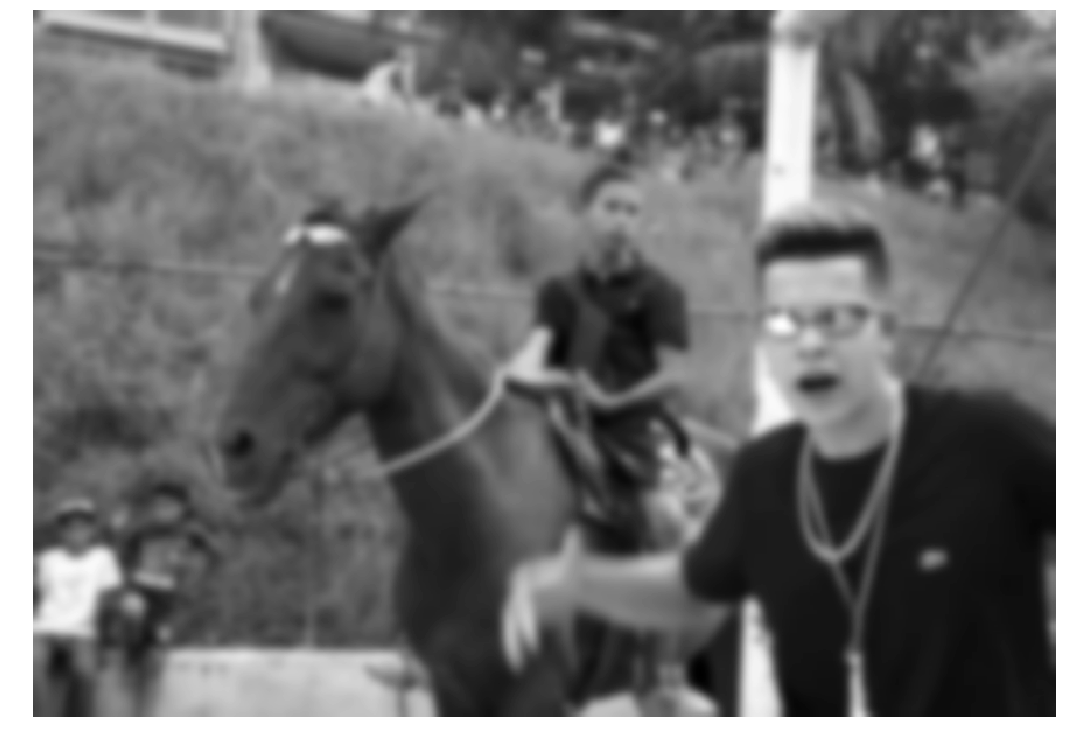

In [358]:
a = filtra_imagem(img,0,4)
print(rmse(a,img))
ishow(a)

- Note que as duas imagens acima tem o RMSE próximo de 7.1, e a primeira é claramente mais próxima da original. Por esse motivo tivemos que procurar uma outra métrica

# Testando Structural similarity index
Para isso, inicialmente, usaremos os mesmos filtros com os mesmos parametros no teste acima
- Note que quando mais próximo de 1, mais parecida

In [354]:
from skimage.measure import compare_ssim as ssim

In [380]:
print("comparacao da imagem original com si mesma:")
print(ssim(img,img))

print("comparacao da imagem mais parecida visualmente:")
a = filtra_imagem(img,1,1.03)
print(ssim(np.asarray(a,np.uint8),img))

print("comparacao da imagem menos parecida visualmente:")
b = filtra_imagem(img,0,4)
print(ssim(np.asarray(b,np.uint8),img))



comparacao da imagem original com si mesma:
1.0
comparacao da imagem mais parecida visualmente
0.969860381429
comparacao da imagem menos parecida visualmente
0.677052759349


- Assim temos um resultado mais fiel a realidade

Zhou Wang; Bovik, A.C.; ,”Mean squared error: Love it or leave it? A new look at Signal Fidelity Measures,” Signal Processing Magazine, IEEE, vol. 26, no. 1, pp. 98-117, Jan. 2009.

# Estudo do Structural similarity index de acordo com os parametros das filtragens

In [395]:
gaussian_ssim = [[],[]] #0<x<4 , step = 0.1
for i in np.arange(0.1,4,0.1): #gaussian
    gaussian_ssim[0] += [i]
    gaussian_ssim[1] += [ssim(img,np.asarray(filtra_imagem(img,0,i),np.uint8))]
gaussian_ssim = np.asarray(gaussian_ssim)

In [396]:
bilateral_ssim = [[],[]]
for i in np.arange(0.1,4,0.1): #gaussian
    bilateral_ssim[0] += [i]
    bilateral_ssim[1] += [ssim(img,np.asarray(filtra_imagem(img,1,i),np.uint8))]
bilateral_ssim = np.asarray(bilateral_ssim)

In [397]:
wavelet_ssim = [[],[]]
for i in np.arange(0.01,0.2,0.01): #gaussian
    wavelet_ssim[0] += [i]
    wavelet_ssim[1] += [ssim(img,np.asarray(filtra_imagem(img,2,i),np.uint8))]
wavelet_ssim = np.asarray(wavelet_ssim)

In [398]:
tvchambolle_ssim = [[],[]]
for i in np.arange(0.01,0.4,0.01): #gaussian
    tvchambolle_ssim[0] += [i]
    tvchambolle_ssim[1] += [ssim(img,np.asarray(filtra_imagem(img,3,i),np.uint8))]
tvchambolle_ssim = np.asarray(tvchambolle_ssim)

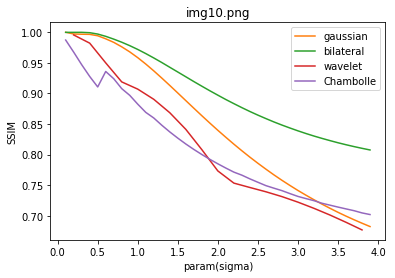

In [400]:

plt.plot(gaussian_ssim[0],gaussian_ssim[1], 'C1',label='gaussian')
plt.plot(bilateral_ssim[0],bilateral_ssim[1],'C2', label='bilateral')
plt.plot(np.asarray(wavelet_ssim[0])*20,wavelet_ssim[1], 'C3', label='wavelet')
plt.plot(np.asarray(tvchambolle_ssim[0])*10,tvchambolle_ssim[1], 'C4', label='Chambolle')

plt.title(nome_arquivo_img_usada)
plt.ylabel('SSIM')
plt.xlabel('param(sigma)')
plt.legend()
plt.show()

- lembrando que mudamos as escalas nos filtros wavelet e tv_chambolle

## SSIM ~ 0.84 com filtro gaussiano

0.845539628475


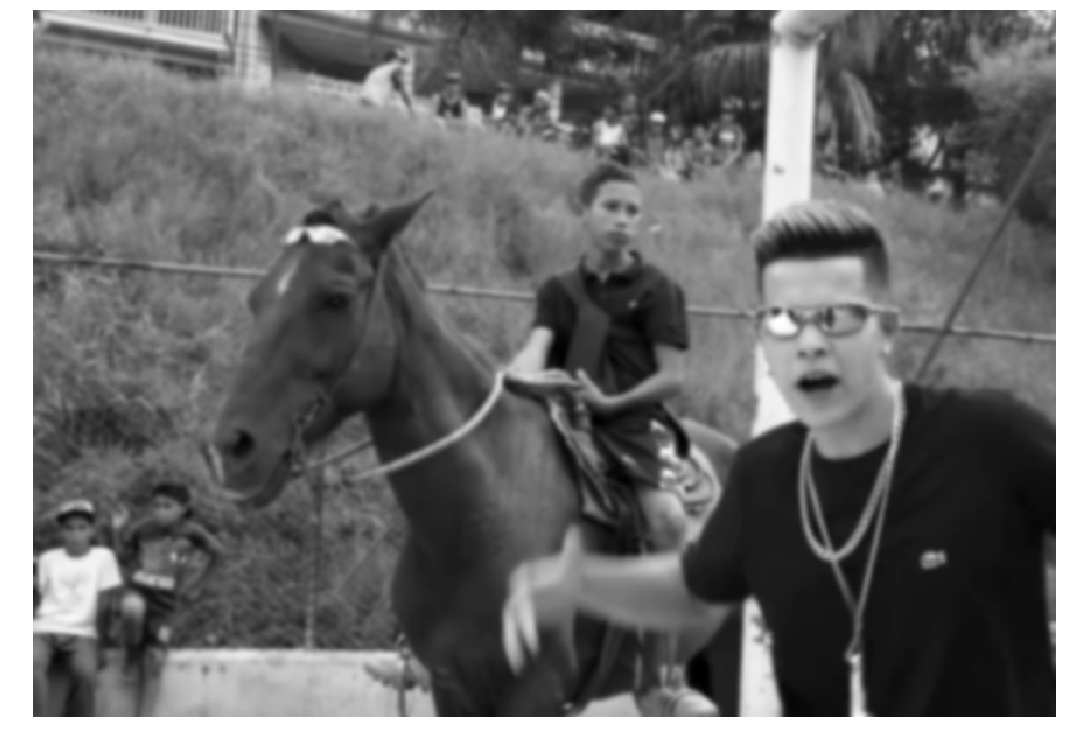

In [426]:
a = filtra_imagem(img,0,1.95) #filtro gaussiano
print(ssim(img,np.asarray(a,np.uint8)))
ishow(a)

## SSIM ~ 0.84 com filtro bilateral

0.848249562306


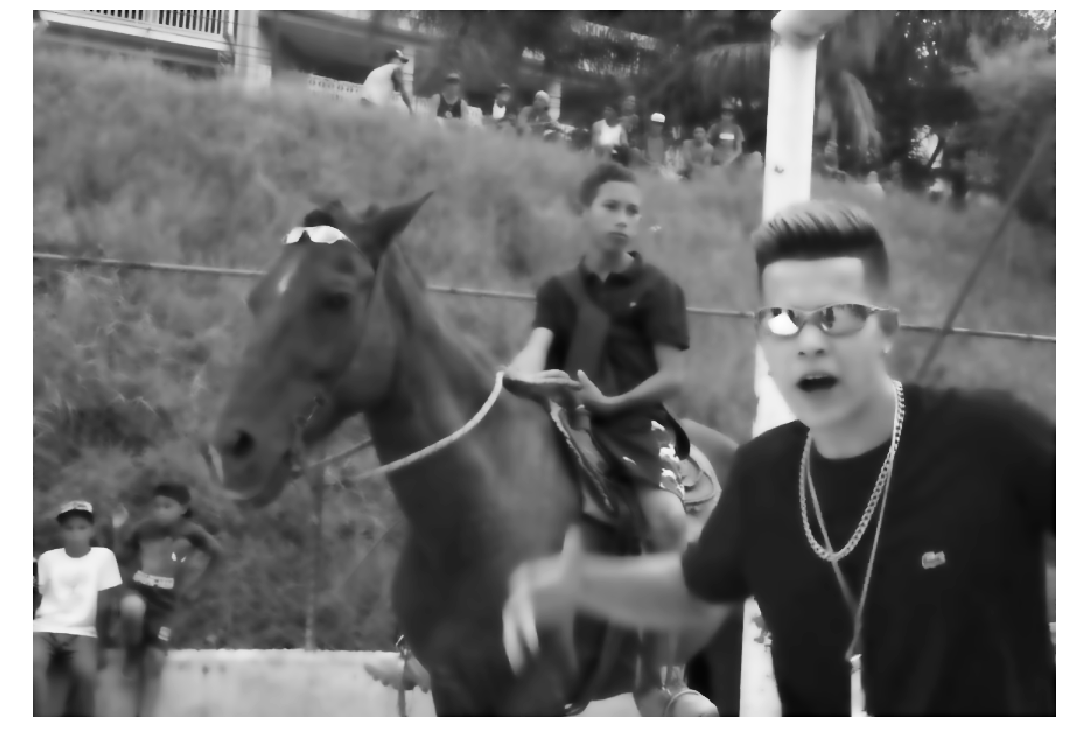

In [427]:
a = filtra_imagem(img,1,2.8) #filtro bilateral
print(ssim(img,np.asarray(a,np.uint8)))
ishow(a)

## SSIM ~ 0.84 com filtro wavelet

0.84123558855


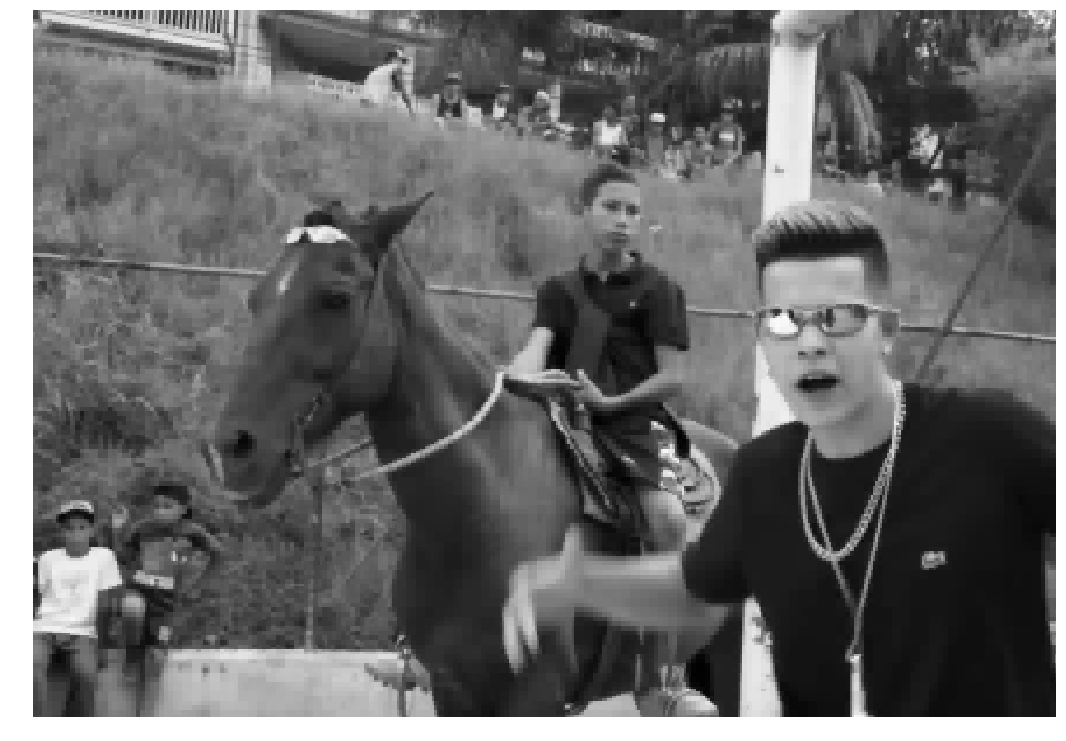

In [428]:
a = filtra_imagem(img,2,1.6/20) #filtro wavelet
print(ssim(img,np.asarray(a,np.uint8)))

ishow(a)


## SSIM ~ 0.84 com filtro total variance chambolle

0.84799272357
8.52879094243


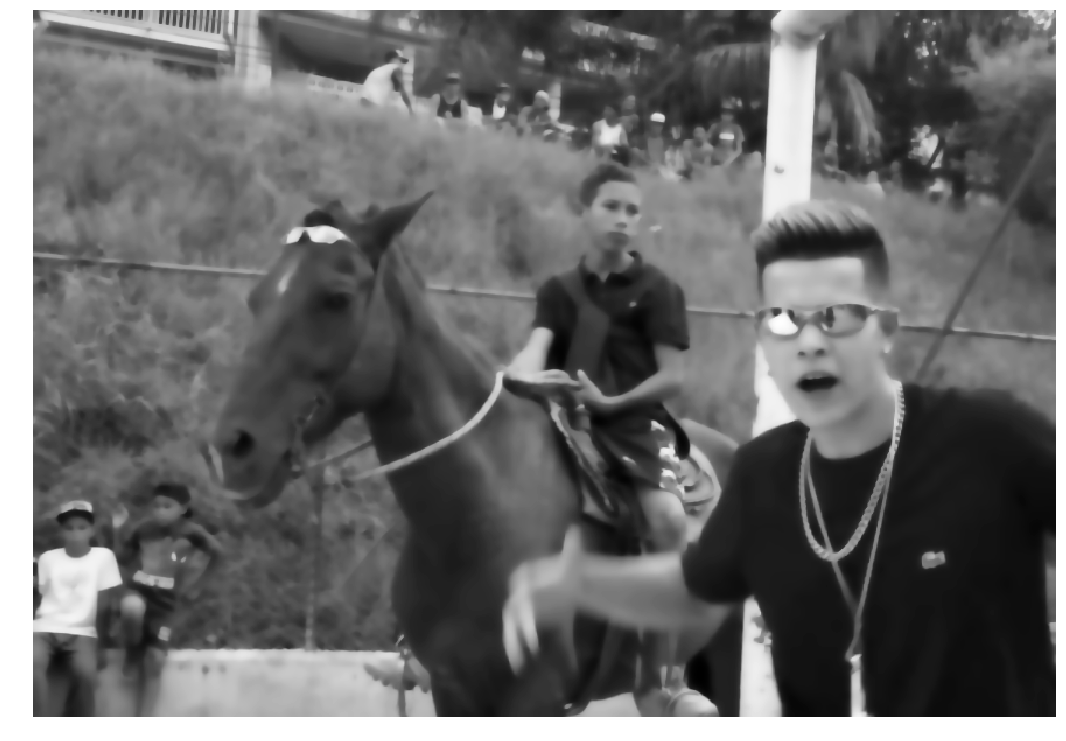

In [429]:
a = filtra_imagem(img,3,1.3/10) # filtro tv_chambolle
print(ssim(img,np.asarray(a,np.uint8)))
print(rmse(img,np.asarray(a,np.uint8)))
ishow(a)

### Podemos notar que ao usar a métrica Structural similarity index nossos resultados são mais fiéis visualmente falando. Por esse motivos usaremos ela a partir de agora

## Visualização da convolução no domínio das frequencias

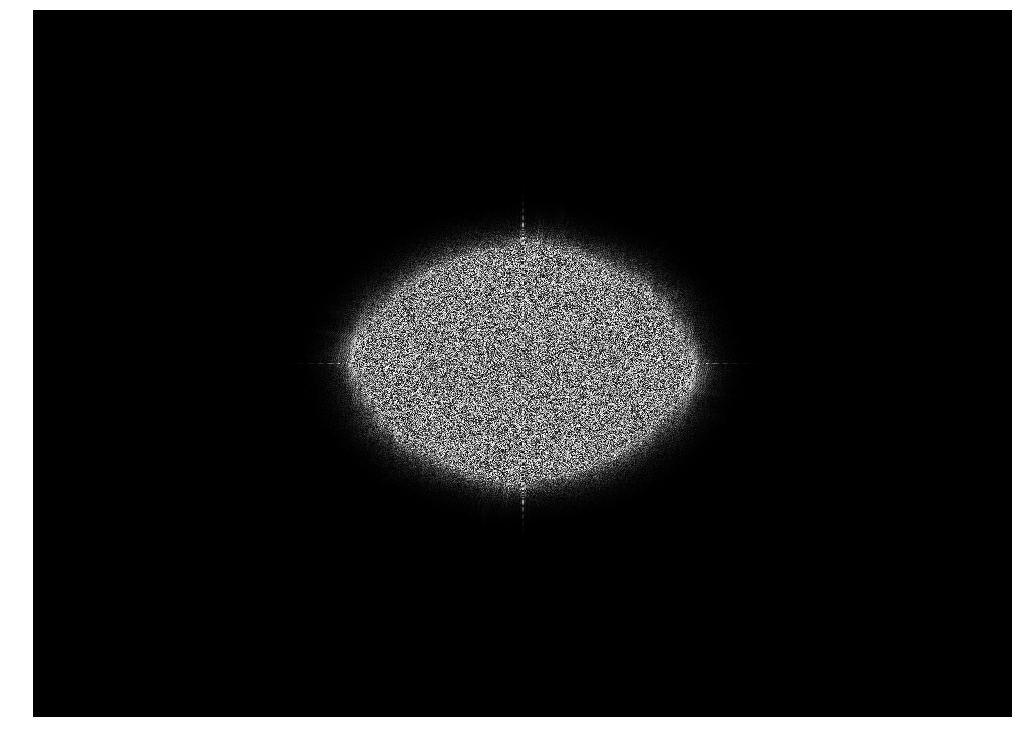

In [11]:
ishow(np.fft.fftshift(np.fft.fft2(img_convolucionada)))

## Mascara utilizada no Espaço de Frequencias

In [12]:
a = np.zeros(fimg.shape)
x = 200
a[int(fimg.shape[0]/2) - x:int(fimg.shape[0]/2) + x,int(fimg.shape[1]/2)- x:int(fimg.shape[1]/2) + x] = 1
b = -(a-1)
imshow(np.asarray(a,np.uint8))

NameError: name 'fimg' is not defined

# Espaço de Frequencias com a mascara aplicada

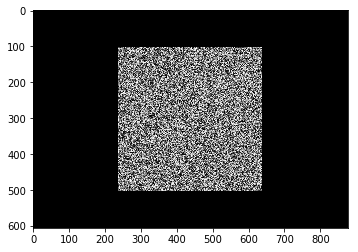

In [39]:
gimg = fimg*a
imshow(np.asarray(abs(gimg),np.uint8),cmap='gray')

In [ ]:
denoise_bilateral

## IFFT aplicada no espaço de frequencia com marcara

53291439


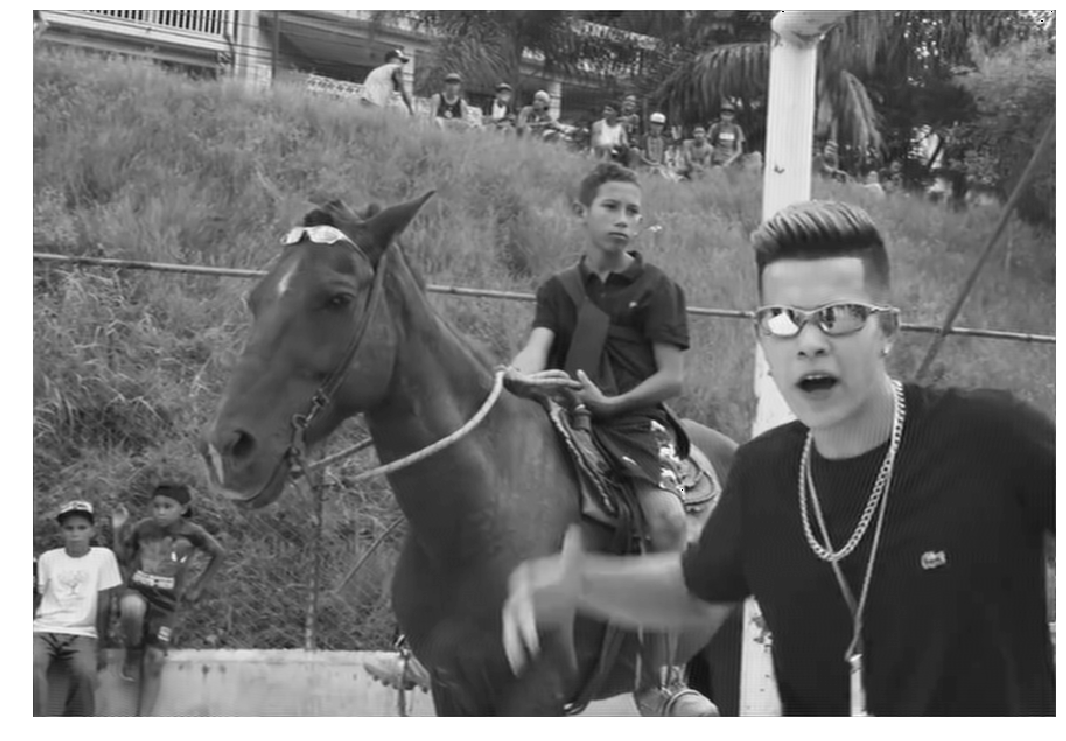

In [42]:
bla = np.fft.ifft2(np.fft.fftshift(gimg))
a =np.asarray(abs(bla),np.uint8)
plt.figure(figsize=(20,13)) 
plt.imshow(a, cmap='gray')
plt.axis('off')
print(np.sum(a))